In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= "ignore")

In [385]:
data = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

In [386]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [387]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [388]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [389]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [390]:
import missingno as msno

<AxesSubplot:>

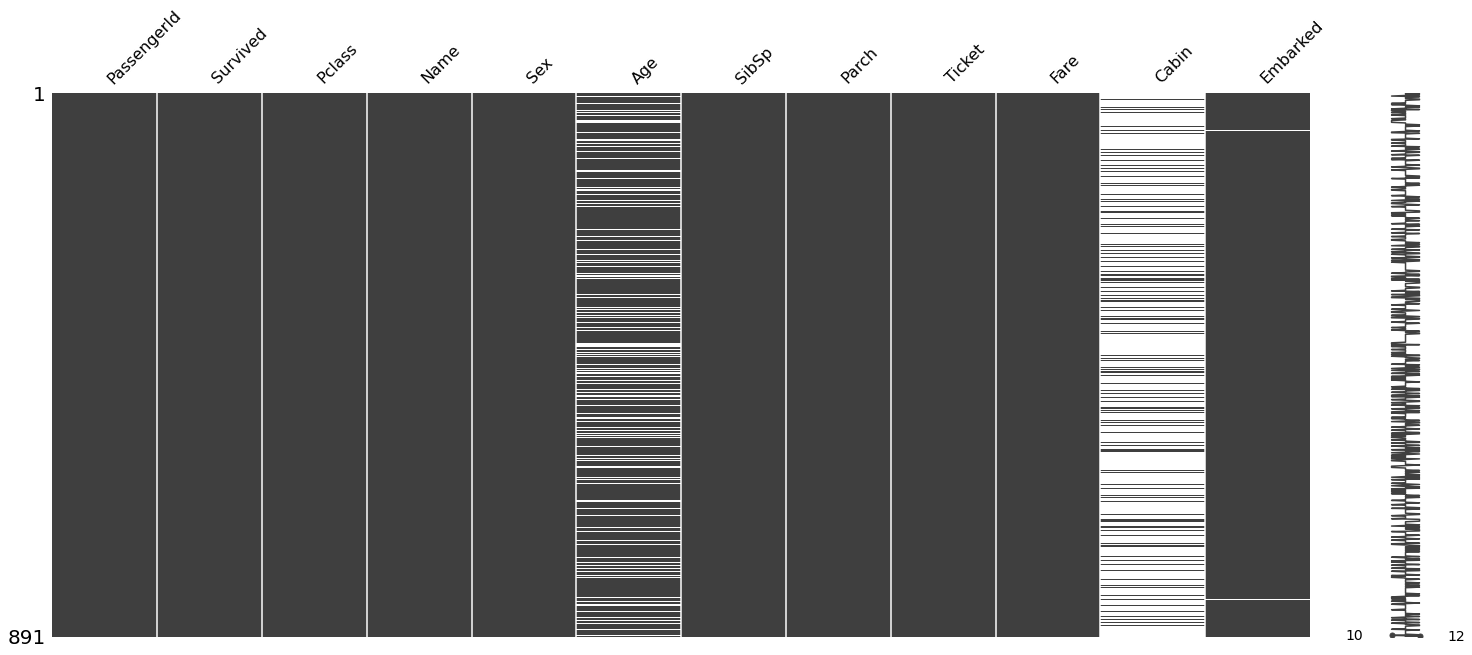

In [391]:
msno.matrix(data)

In [392]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [393]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [394]:
cat_col = ['Survived', 'Pclass','Sex','SibSp',
           'Parch','Cabin', 'Embarked']

In [395]:
for i in data[cat_col]:
    print("\n",i,"\n","-"*10)
    print(data[i].value_counts())


 Survived 
 ----------
0    549
1    342
Name: Survived, dtype: int64

 Pclass 
 ----------
3    491
1    216
2    184
Name: Pclass, dtype: int64

 Sex 
 ----------
male      577
female    314
Name: Sex, dtype: int64

 SibSp 
 ----------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

 Parch 
 ----------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

 Cabin 
 ----------
G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
              ..
B50            1
A36            1
T              1
C30            1
B30            1
Name: Cabin, Length: 147, dtype: int64

 Embarked 
 ----------
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [396]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [397]:
data.Sex = data["Sex"].replace("male", 1)
data.Sex = data["Sex"].replace("female",0)

sns.pairplot(new_data, diag_kind='kde')

<AxesSubplot:xlabel='Age', ylabel='Count'>

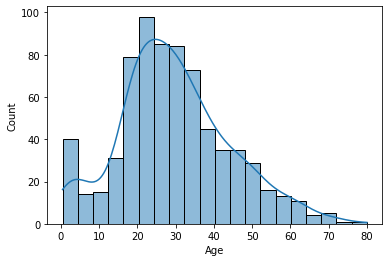

In [398]:
sns.histplot(data.Age,kde = True )

In [399]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [400]:
data.Age = data.Age.replace(np.nan, 0)

In [401]:
data.Age.describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [402]:
data.Age = data.Age.replace(0, data.Age.mean())

<AxesSubplot:ylabel='Frequency'>

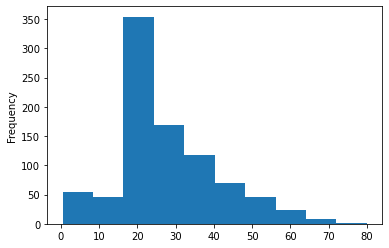

In [403]:
data.Age.plot(kind="hist")

In [404]:
new_data = data.drop(["PassengerId","Name", "Ticket", "Cabin","Embarked"], axis = 1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [405]:
new_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.052257,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.356857,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.072964,-0.114631,-0.245489,-0.182333
Age,-0.052257,-0.356857,0.072964,1.000000,-0.232278,-0.154200,0.108050
SibSp,-0.035322,0.083081,-0.114631,-0.232278,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.154200,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.108050,0.159651,0.216225,1.000000


<AxesSubplot:>

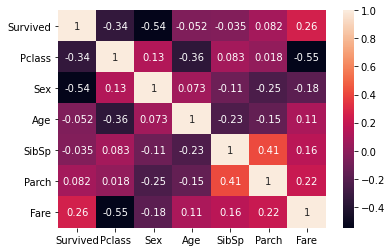

In [406]:
sns.heatmap(new_data.corr(), annot=True)

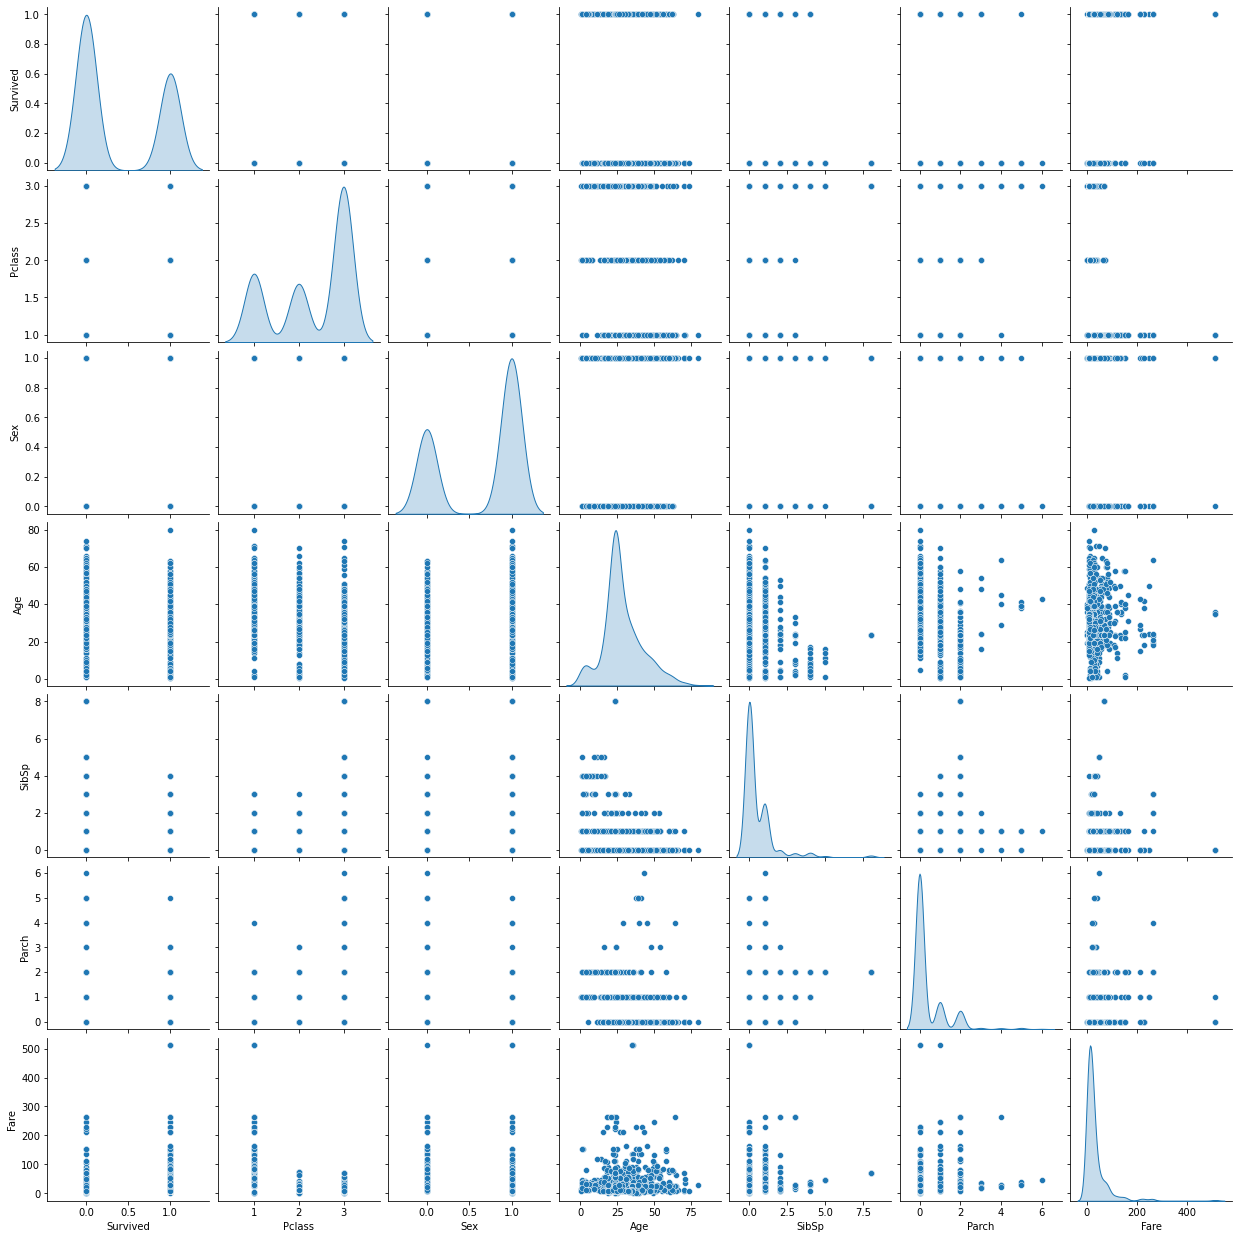

In [407]:
sns.pairplot(new_data, diag_kind="kde")

In [408]:
X = new_data.drop("Survived", axis = 1)
y = new_data.Survived

In [409]:
from sklearn.model_selection import train_test_split

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [411]:
from sklearn.preprocessing import PowerTransformer
pr = PowerTransformer()

In [412]:
X_train = pr.fit_transform(X_train)
X_test = pr.transform(X_test)

In [413]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [414]:
Xtrain_scaled = sc.fit_transform(X_train)
Xtest_scaled = sc.transform(X_test)

In [415]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [416]:
dt.fit(Xtrain_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [417]:
from sklearn.metrics import accuracy_score

In [418]:
y_pred = dt.predict(Xtest_scaled)

In [419]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [451]:
grid_params = {"criterion" : ["gini", "entropy"],
               "max_features" : range(3,7,1),
              "max_depth" : range(2,10,1),
              "min_samples_leaf" : range(2,5,1) ,
               "min_samples_split" : range(2,10,1),
              "splitter":['best', 'random']}

In [452]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt,param_grid=grid_params,n_jobs=-1, cv=5)

In [453]:
grid.fit(Xtrain_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=6,
                                              max_features=3,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=4,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10), 'max_features': range(3, 7),
 

In [454]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'best'}

In [455]:
dt = grid.best_estimator_

In [456]:
dt.fit(Xtrain_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [457]:
y_pred = dt.predict(Xtest_scaled)

In [458]:
print("Train accuracy: ",round(dt.score(Xtrain_scaled, y_train),3))
print("Test accuracy: ", round(dt.score(Xtest_scaled, y_test),3))

Train accuracy:  0.834
Test accuracy:  0.804
